In [1]:
!nvidia-smi


Wed Aug 21 15:44:37 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             11W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
!pip install ultralytics -q

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.79 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5771.7/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

import roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="X8dOpA6pB8Zh2GYt6yCM")
project = rf.workspace("madhu-bzqtw").project("dataset-mizpx")
version = project.version(6)
dataset = version.download("yolov8-obb")
                

import yaml

with open(f'{dataset.location}/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

data['path'] = dataset.location

with open(f'{dataset.location}/data.yaml', 'w') as file:
    yaml.dump(data, file, sort_keys=False)

/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.3 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dataset-6 in yolov8-obb:: 100%|██████████| 812/812 [00:00<00:00, 5981.36it/s]


In [7]:
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=400)

Ultralytics YOLOv8.2.79 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/kaggle/working/datasets/Dataset-6/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

train: Scanning /kaggle/working/datasets/Dataset-6/train/labels.cache... 280 images, 61 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/datasets/Dataset-6/valid/labels.cache... 80 images, 17 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to runs/obb/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/obb/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.39G      2.482      3.283      2.815         41        416: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]


                   all         80        323      0.128      0.252      0.102     0.0421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       1.2G      2.224      2.596      2.589         22        416: 100%|██████████| 18/18 [00:02<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all         80        323      0.149      0.345      0.167     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.19G      2.114      2.382      2.461         66        416: 100%|██████████| 18/18 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]

                   all         80        323      0.296      0.393      0.304      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.19G       1.91      2.223      2.461         49        416: 100%|██████████| 18/18 [00:02<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]

                   all         80        323      0.381      0.408      0.278      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       1.2G      1.967      2.181       2.52         22        416: 100%|██████████| 18/18 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]

                   all         80        323       0.26      0.416      0.274      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.19G      1.859      2.128      2.411         21        416: 100%|██████████| 18/18 [00:02<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.17it/s]

                   all         80        323       0.23      0.378      0.249      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.19G       1.86      2.094      2.403         55        416: 100%|██████████| 18/18 [00:02<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.14it/s]

                   all         80        323      0.309      0.287      0.263      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.19G      1.848      2.021      2.487         73        416: 100%|██████████| 18/18 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.74it/s]

                   all         80        323      0.279      0.429      0.227      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.21G      1.892      1.978      2.429         33        416: 100%|██████████| 18/18 [00:02<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]

                   all         80        323       0.38       0.34      0.301      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.19G      1.887      1.978      2.319         27        416: 100%|██████████| 18/18 [00:01<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.50it/s]

                   all         80        323      0.423      0.284      0.265      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.19G       1.88      2.013      2.305         39        416: 100%|██████████| 18/18 [00:01<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.94it/s]

                   all         80        323      0.279      0.353      0.276      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.19G      1.755      1.912      2.321         86        416: 100%|██████████| 18/18 [00:02<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.26it/s]

                   all         80        323      0.334      0.388      0.273      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.19G      1.769      1.947      2.372         30        416: 100%|██████████| 18/18 [00:02<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.86it/s]

                   all         80        323      0.339      0.406      0.301      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.21G      1.753      1.792      2.349         42        416: 100%|██████████| 18/18 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]

                   all         80        323      0.339      0.418      0.306      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.19G      1.674      1.802      2.297         37        416: 100%|██████████| 18/18 [00:02<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]

                   all         80        323      0.258      0.241      0.175     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.19G      1.715        1.8      2.382         33        416: 100%|██████████| 18/18 [00:02<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.68it/s]

                   all         80        323      0.323       0.35      0.296      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.19G      1.687       1.83      2.396         45        416: 100%|██████████| 18/18 [00:02<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.13it/s]

                   all         80        323      0.395      0.376      0.303      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.19G      1.678      1.747      2.341         43        416: 100%|██████████| 18/18 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.20it/s]

                   all         80        323      0.375       0.33      0.268      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.19G      1.682      1.738      2.277         79        416: 100%|██████████| 18/18 [00:02<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.51it/s]

                   all         80        323      0.297       0.34      0.252      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.19G      1.676      1.778      2.309         33        416: 100%|██████████| 18/18 [00:02<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.86it/s]

                   all         80        323      0.336      0.371      0.263      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.19G       1.67      1.697      2.307         43        416: 100%|██████████| 18/18 [00:02<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.37it/s]

                   all         80        323      0.434      0.309      0.305      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.19G       1.63      1.674      2.327         51        416: 100%|██████████| 18/18 [00:02<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.57it/s]

                   all         80        323      0.396      0.364      0.317      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.19G      1.605      1.645      2.279         37        416: 100%|██████████| 18/18 [00:02<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.11it/s]

                   all         80        323      0.361      0.409      0.316      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.19G      1.568      1.609      2.263         43        416: 100%|██████████| 18/18 [00:02<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.66it/s]

                   all         80        323       0.47       0.39      0.347      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.21G      1.635      1.603      2.199         74        416: 100%|██████████| 18/18 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.51it/s]

                   all         80        323      0.348      0.398      0.275      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.19G      1.597      1.588      2.189         67        416: 100%|██████████| 18/18 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.09it/s]

                   all         80        323      0.214      0.349      0.199      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       1.2G      1.613      1.578       2.22         42        416: 100%|██████████| 18/18 [00:02<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.35it/s]

                   all         80        323      0.277      0.254        0.2     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.19G      1.587      1.562      2.236         31        416: 100%|██████████| 18/18 [00:02<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.64it/s]

                   all         80        323      0.309      0.403      0.294       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       1.2G      1.537      1.508      2.136         42        416: 100%|██████████| 18/18 [00:02<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.06it/s]

                   all         80        323      0.388      0.309      0.223      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.19G      1.547      1.549       2.17         30        416: 100%|██████████| 18/18 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.58it/s]

                   all         80        323      0.345       0.29      0.225      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.19G      1.551      1.508       2.16         49        416: 100%|██████████| 18/18 [00:01<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.75it/s]

                   all         80        323      0.448      0.309      0.264      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.19G       1.54       1.53      2.222         53        416: 100%|██████████| 18/18 [00:02<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.04it/s]

                   all         80        323       0.45      0.388      0.357      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.19G      1.451      1.413      2.117         63        416: 100%|██████████| 18/18 [00:02<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.83it/s]

                   all         80        323      0.364       0.44       0.35      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       1.2G      1.525      1.459      2.172         83        416: 100%|██████████| 18/18 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.05it/s]

                   all         80        323      0.424      0.358      0.319       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.19G      1.467      1.434      2.098         36        416: 100%|██████████| 18/18 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.86it/s]

                   all         80        323      0.468      0.399      0.326       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.19G      1.453      1.391      2.105         41        416: 100%|██████████| 18/18 [00:01<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.72it/s]

                   all         80        323      0.438      0.307       0.27      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.19G      1.438      1.319      2.048         68        416: 100%|██████████| 18/18 [00:02<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.08it/s]

                   all         80        323      0.427       0.35      0.288       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       1.2G      1.447      1.386      2.193         41        416: 100%|██████████| 18/18 [00:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.88it/s]

                   all         80        323      0.546      0.285      0.271      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.26G      1.462      1.395      2.174         23        416: 100%|██████████| 18/18 [00:02<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.03it/s]

                   all         80        323      0.511       0.28      0.271      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.19G      1.491      1.403      2.151         45        416: 100%|██████████| 18/18 [00:02<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.75it/s]

                   all         80        323      0.342      0.307      0.252      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.19G      1.442      1.381      2.156         33        416: 100%|██████████| 18/18 [00:01<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.88it/s]

                   all         80        323      0.516      0.331       0.29      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.19G      1.429      1.401      2.133         37        416: 100%|██████████| 18/18 [00:02<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.41it/s]

                   all         80        323      0.467      0.322      0.273      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.21G      1.418       1.35      2.076         40        416: 100%|██████████| 18/18 [00:02<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.98it/s]

                   all         80        323      0.394      0.367      0.264      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.19G      1.457       1.31      2.141         31        416: 100%|██████████| 18/18 [00:02<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.49it/s]

                   all         80        323      0.468      0.384      0.324      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       1.2G      1.394      1.275      2.038         72        416: 100%|██████████| 18/18 [00:02<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.65it/s]

                   all         80        323      0.455       0.38       0.35      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.27G      1.402      1.287      2.089         42        416: 100%|██████████| 18/18 [00:02<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.64it/s]

                   all         80        323      0.462      0.325      0.305      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.19G      1.407      1.221       2.05         45        416: 100%|██████████| 18/18 [00:01<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.31it/s]

                   all         80        323      0.417      0.349       0.33      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.19G      1.383       1.27      2.127         36        416: 100%|██████████| 18/18 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.15it/s]

                   all         80        323      0.364      0.388      0.269      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.19G      1.378      1.236      2.015         26        416: 100%|██████████| 18/18 [00:02<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.01it/s]

                   all         80        323      0.415      0.342      0.273      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.19G      1.377      1.191      2.021         42        416: 100%|██████████| 18/18 [00:02<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.35it/s]

                   all         80        323      0.389      0.355      0.276      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.19G      1.385      1.224       2.07         39        416: 100%|██████████| 18/18 [00:02<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.23it/s]

                   all         80        323      0.401      0.399      0.322      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.19G      1.432        1.3       2.11         61        416: 100%|██████████| 18/18 [00:02<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.48it/s]

                   all         80        323      0.477      0.322      0.288      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.19G      1.355        1.2      2.026         37        416: 100%|██████████| 18/18 [00:01<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.07it/s]

                   all         80        323      0.438      0.313       0.26      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.19G      1.311      1.163       2.07         15        416: 100%|██████████| 18/18 [00:02<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.25it/s]

                   all         80        323      0.471      0.331      0.295      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.19G      1.348      1.219      2.035         52        416: 100%|██████████| 18/18 [00:02<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.00it/s]

                   all         80        323      0.475       0.35      0.312      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       1.2G      1.306      1.181      2.065         31        416: 100%|██████████| 18/18 [00:02<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.87it/s]

                   all         80        323      0.485      0.315      0.293      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.19G      1.312      1.179      1.967         75        416: 100%|██████████| 18/18 [00:01<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.64it/s]

                   all         80        323      0.387      0.396      0.284      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.19G      1.335      1.174      2.079         40        416: 100%|██████████| 18/18 [00:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.27it/s]

                   all         80        323      0.365      0.399      0.276      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.19G      1.318      1.136      2.083         51        416: 100%|██████████| 18/18 [00:02<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.10it/s]

                   all         80        323       0.46      0.353      0.286      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       1.2G      1.282      1.159      2.066         44        416: 100%|██████████| 18/18 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.53it/s]

                   all         80        323      0.517        0.3      0.273      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.19G      1.285       1.14      2.054         47        416: 100%|██████████| 18/18 [00:02<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.99it/s]

                   all         80        323      0.459      0.368      0.338       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.19G      1.266       1.12      2.065         28        416: 100%|██████████| 18/18 [00:02<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.40it/s]

                   all         80        323      0.519      0.366      0.327      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.23G      1.288      1.126      1.934         69        416: 100%|██████████| 18/18 [00:02<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.00it/s]

                   all         80        323      0.484      0.408      0.323      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.19G      1.294      1.103       1.97         36        416: 100%|██████████| 18/18 [00:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.40it/s]

                   all         80        323      0.521      0.366      0.304      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       1.2G      1.249      1.062      1.967         66        416: 100%|██████████| 18/18 [00:02<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.70it/s]

                   all         80        323      0.501      0.401      0.317      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       1.2G      1.245      1.055      1.963         51        416: 100%|██████████| 18/18 [00:02<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.41it/s]

                   all         80        323      0.519      0.352      0.304      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.19G      1.196      1.041      1.869         37        416: 100%|██████████| 18/18 [00:02<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.03it/s]

                   all         80        323      0.459      0.335      0.306      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.19G      1.247      1.064      1.992         18        416: 100%|██████████| 18/18 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.19it/s]

                   all         80        323      0.506      0.385      0.336      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.19G      1.245      1.028      2.013         31        416: 100%|██████████| 18/18 [00:02<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.35it/s]

                   all         80        323      0.445        0.4      0.326      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.19G      1.263      1.069      1.999         11        416: 100%|██████████| 18/18 [00:02<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.41it/s]

                   all         80        323      0.402      0.418       0.29      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.19G        1.2      1.007      1.943         47        416: 100%|██████████| 18/18 [00:02<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.93it/s]

                   all         80        323      0.521      0.315      0.277      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.19G      1.232      1.046      1.989         61        416: 100%|██████████| 18/18 [00:02<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.28it/s]

                   all         80        323       0.56       0.31      0.311      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       1.2G      1.177      1.005      1.961         39        416: 100%|██████████| 18/18 [00:01<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.08it/s]

                   all         80        323      0.432      0.356      0.293      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.19G      1.175     0.9795      1.915         29        416: 100%|██████████| 18/18 [00:01<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.32it/s]

                   all         80        323      0.418      0.335      0.281      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.24G      1.222      1.008      1.939         31        416: 100%|██████████| 18/18 [00:01<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.84it/s]

                   all         80        323       0.51      0.341      0.297      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.19G      1.174      0.998      1.968         29        416: 100%|██████████| 18/18 [00:01<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.86it/s]

                   all         80        323      0.515      0.317      0.298      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.19G      1.157     0.9674      1.991         26        416: 100%|██████████| 18/18 [00:02<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.22it/s]

                   all         80        323      0.424      0.358      0.294      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       1.2G      1.174     0.9427      1.913         46        416: 100%|██████████| 18/18 [00:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.80it/s]

                   all         80        323      0.487      0.358      0.291      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.19G      1.206     0.9995      1.936         38        416: 100%|██████████| 18/18 [00:02<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.40it/s]

                   all         80        323       0.42      0.355      0.275      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.19G      1.214     0.9649      1.934         31        416: 100%|██████████| 18/18 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.38it/s]

                   all         80        323      0.408      0.359      0.269      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.19G      1.162     0.9552      1.908         15        416: 100%|██████████| 18/18 [00:02<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.33it/s]

                   all         80        323      0.483      0.279      0.254      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.19G      1.163     0.9398      1.879         30        416: 100%|██████████| 18/18 [00:02<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.67it/s]

                   all         80        323      0.434      0.324      0.264      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.21G      1.205     0.9765      1.922        138        416: 100%|██████████| 18/18 [00:01<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.16it/s]

                   all         80        323      0.484      0.318      0.268       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.19G      1.139     0.9243      1.914         45        416: 100%|██████████| 18/18 [00:02<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.29it/s]

                   all         80        323      0.508      0.341      0.295      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.19G      1.158      1.002      1.945         32        416: 100%|██████████| 18/18 [00:01<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.25it/s]

                   all         80        323       0.49      0.357       0.29      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.24G       1.12     0.9119       1.79         39        416: 100%|██████████| 18/18 [00:02<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.07it/s]

                   all         80        323      0.504      0.358      0.293      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       1.2G       1.07     0.8905      1.856         37        416: 100%|██████████| 18/18 [00:01<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.60it/s]

                   all         80        323      0.548      0.346      0.297      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.19G      1.158     0.9157      1.879         50        416: 100%|██████████| 18/18 [00:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.10it/s]

                   all         80        323      0.522      0.358      0.307      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.19G      1.154      0.965      1.896         34        416: 100%|██████████| 18/18 [00:01<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.46it/s]

                   all         80        323      0.512      0.356      0.299      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.19G       1.14     0.9137      1.928         31        416: 100%|██████████| 18/18 [00:02<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.37it/s]

                   all         80        323      0.507      0.349      0.293      0.148


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.33G      1.082     0.9246      1.885          5        416: 100%|██████████| 18/18 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.28it/s]

                   all         80        323      0.536      0.298      0.272      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.19G       1.09     0.8946      1.855         16        416: 100%|██████████| 18/18 [00:02<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.88it/s]

                   all         80        323      0.463      0.318      0.265      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.27G     0.9866     0.7998      1.775         12        416: 100%|██████████| 18/18 [00:01<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.49it/s]

                   all         80        323      0.448      0.325      0.265      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.19G      1.003     0.8376      1.785         21        416: 100%|██████████| 18/18 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.98it/s]

                   all         80        323      0.515      0.329      0.281      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.19G     0.9802     0.7977       1.81         18        416: 100%|██████████| 18/18 [00:02<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.47it/s]

                   all         80        323      0.515      0.334      0.296      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.19G      1.016     0.8239      1.825         22        416: 100%|██████████| 18/18 [00:01<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.34it/s]

                   all         80        323      0.501      0.347      0.295      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.19G     0.9719     0.7719      1.764         23        416: 100%|██████████| 18/18 [00:01<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.15it/s]

                   all         80        323      0.509       0.35      0.296      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.19G     0.9522     0.7138      1.754         27        416: 100%|██████████| 18/18 [00:01<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.44it/s]

                   all         80        323        0.5      0.339      0.285      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.19G     0.9694     0.7484      1.771         10        416: 100%|██████████| 18/18 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.46it/s]

                   all         80        323      0.512      0.334      0.286      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.19G     0.9774     0.7846      1.768         18        416: 100%|██████████| 18/18 [00:01<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.53it/s]

                   all         80        323      0.507      0.356      0.296      0.148



100 epochs completed in 0.106 hours.
Optimizer stripped from runs/obb/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/obb/train2/weights/best.pt, 6.5MB

Validating runs/obb/train2/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,609 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


                   all         80        323      0.363      0.441      0.349      0.187
          Tennis field         18         43      0.473      0.543      0.487      0.285
                houses         51        280      0.254      0.339      0.211       0.09
Speed: 0.5ms preprocess, 2.6ms inference, 0.0ms loss, 12.3ms postprocess per image
Results saved to runs/obb/train2


In [8]:
model = YOLO('runs/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])


image 1/1 /kaggle/working/datasets/Dataset-6/test/images/P1264_png.rf.c9d361d2fb2c75f2733ac87478f44321.jpg: 416x416 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 3.2ms postprocess per image at shape (1, 3, 416, 416)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Tennis field', 1: 'houses'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[ 83,  83,  83],
        [ 85,  85,  85],
        [ 87,  87,  87],
        ...,
        [ 85,  85,  85],
        [ 86,  86,  86],
        [ 88,  88,  88]],

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 88,  88,  88],
        ...,
        [ 85,  85,  85],
        [ 86,  86,  86],
        [ 87,  87,  87]],

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 86,  86,  86]],

       ...,

       [[103, 103, 103],
        [105, 105, 105],
        [106, 106, 106],
     

In [54]:
from ultralytics import YOLO  # Import YOLO from ultralytics
import supervision as sv
import cv2
import os
import random

# Load the trained YOLOv8-OBB model
model = YOLO('runs/obb/train/weights/best.pt')

# Randomly select a file from the test images
random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

# Run the model on the selected image
results = model(file_name)

# Check if the results contain any detections
if results and results[0].boxes:
    # Extract the bounding box information
    boxes = results[0].boxes

    # Manually create labels based on class IDs from the YOLO results
    class_labels = ["Tennis court", "House"]  # Replace with your class names
    
    # Check if the class IDs are available and extract them
    if hasattr(boxes, 'cls'):
        labels = [class_labels[int(cls)] for cls in boxes.cls]

        # Extract detections from the YOLO model's results
        detections = sv.Detections.from_ultralytics(results[0])

        # Assign the labels to the detections object
        detections.labels = labels

        # Create an OrientedBoxAnnotator instance
        oriented_box_annotator = sv.OrientedBoxAnnotator()

        # Annotate the image with bounding boxes and labels
        annotated_frame = oriented_box_annotator.annotate(
            scene=cv2.imread(file_name),
            detections=detections
        )

        # Display the annotated image
        sv.plot_image(image=annotated_frame, size=(16, 16))
    else:
        print("No class IDs found in the results.")
else:
    print("No detections found in the results.")



image 1/1 /kaggle/working/datasets/Dataset-6/test/images/P0959_png.rf.d0523ec65a644ae9fe6471c98d93a01d.jpg: 416x416 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 416)
No detections found in the results.


In [55]:
print(results)


[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Tennis field', 1: 'houses'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[50, 59, 56],
        [50, 59, 56],
        [50, 59, 56],
        ...,
        [51, 58, 55],
        [51, 58, 55],
        [51, 58, 55]],

       [[50, 59, 56],
        [50, 59, 56],
        [50, 59, 56],
        ...,
        [51, 58, 55],
        [51, 58, 55],
        [51, 58, 55]],

       [[50, 59, 56],
        [50, 59, 56],
        [50, 59, 56],
        ...,
        [51, 58, 55],
        [51, 58, 55],
        [51, 58, 55]],

       ...,

       [[36, 52, 41],
        [56, 72, 61],
        [60, 76, 65],
        ...,
        [44, 50, 49],
        [44, 50, 49],
        [44, 50, 49]],

       [[50, 66, 55],
        [67, 83, 72],
        [50, 66, 55],
        ...,
        [44, 50, 49],
        [44, 50, 49],
        [44, 50, 49]],

       [[59, 75, 64],
        [68, 84, 73],
        [37, 5

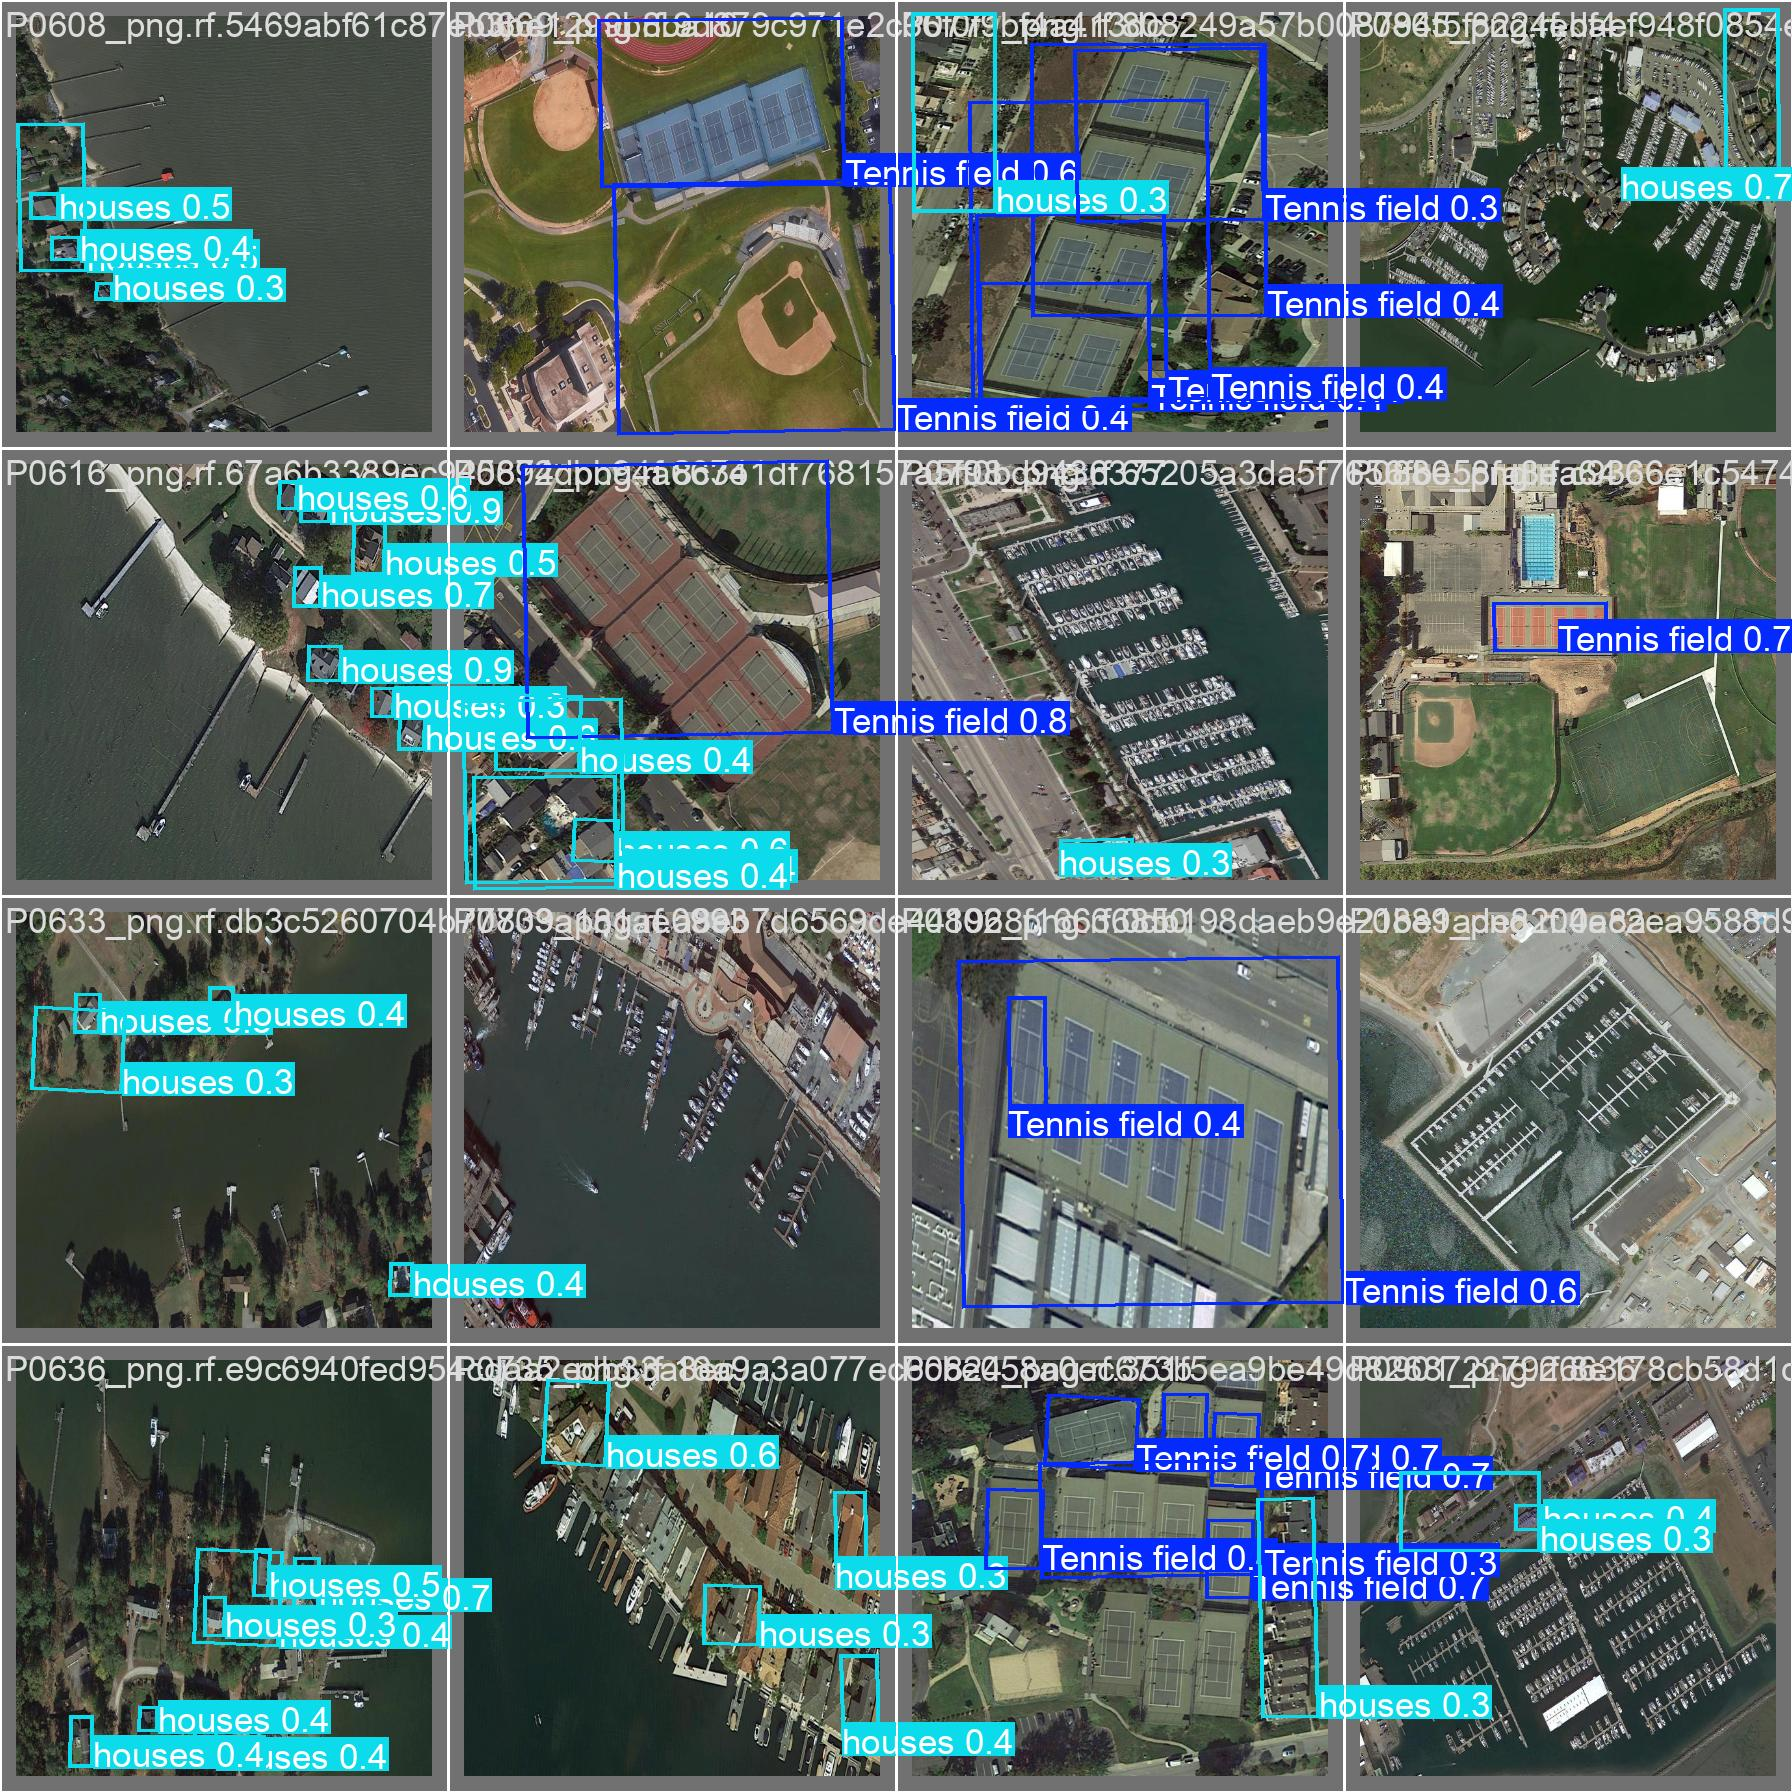

In [64]:
Image(filename= '/kaggle/working/datasets/runs/obb/train2/val_batch2_pred.jpg', width=600)

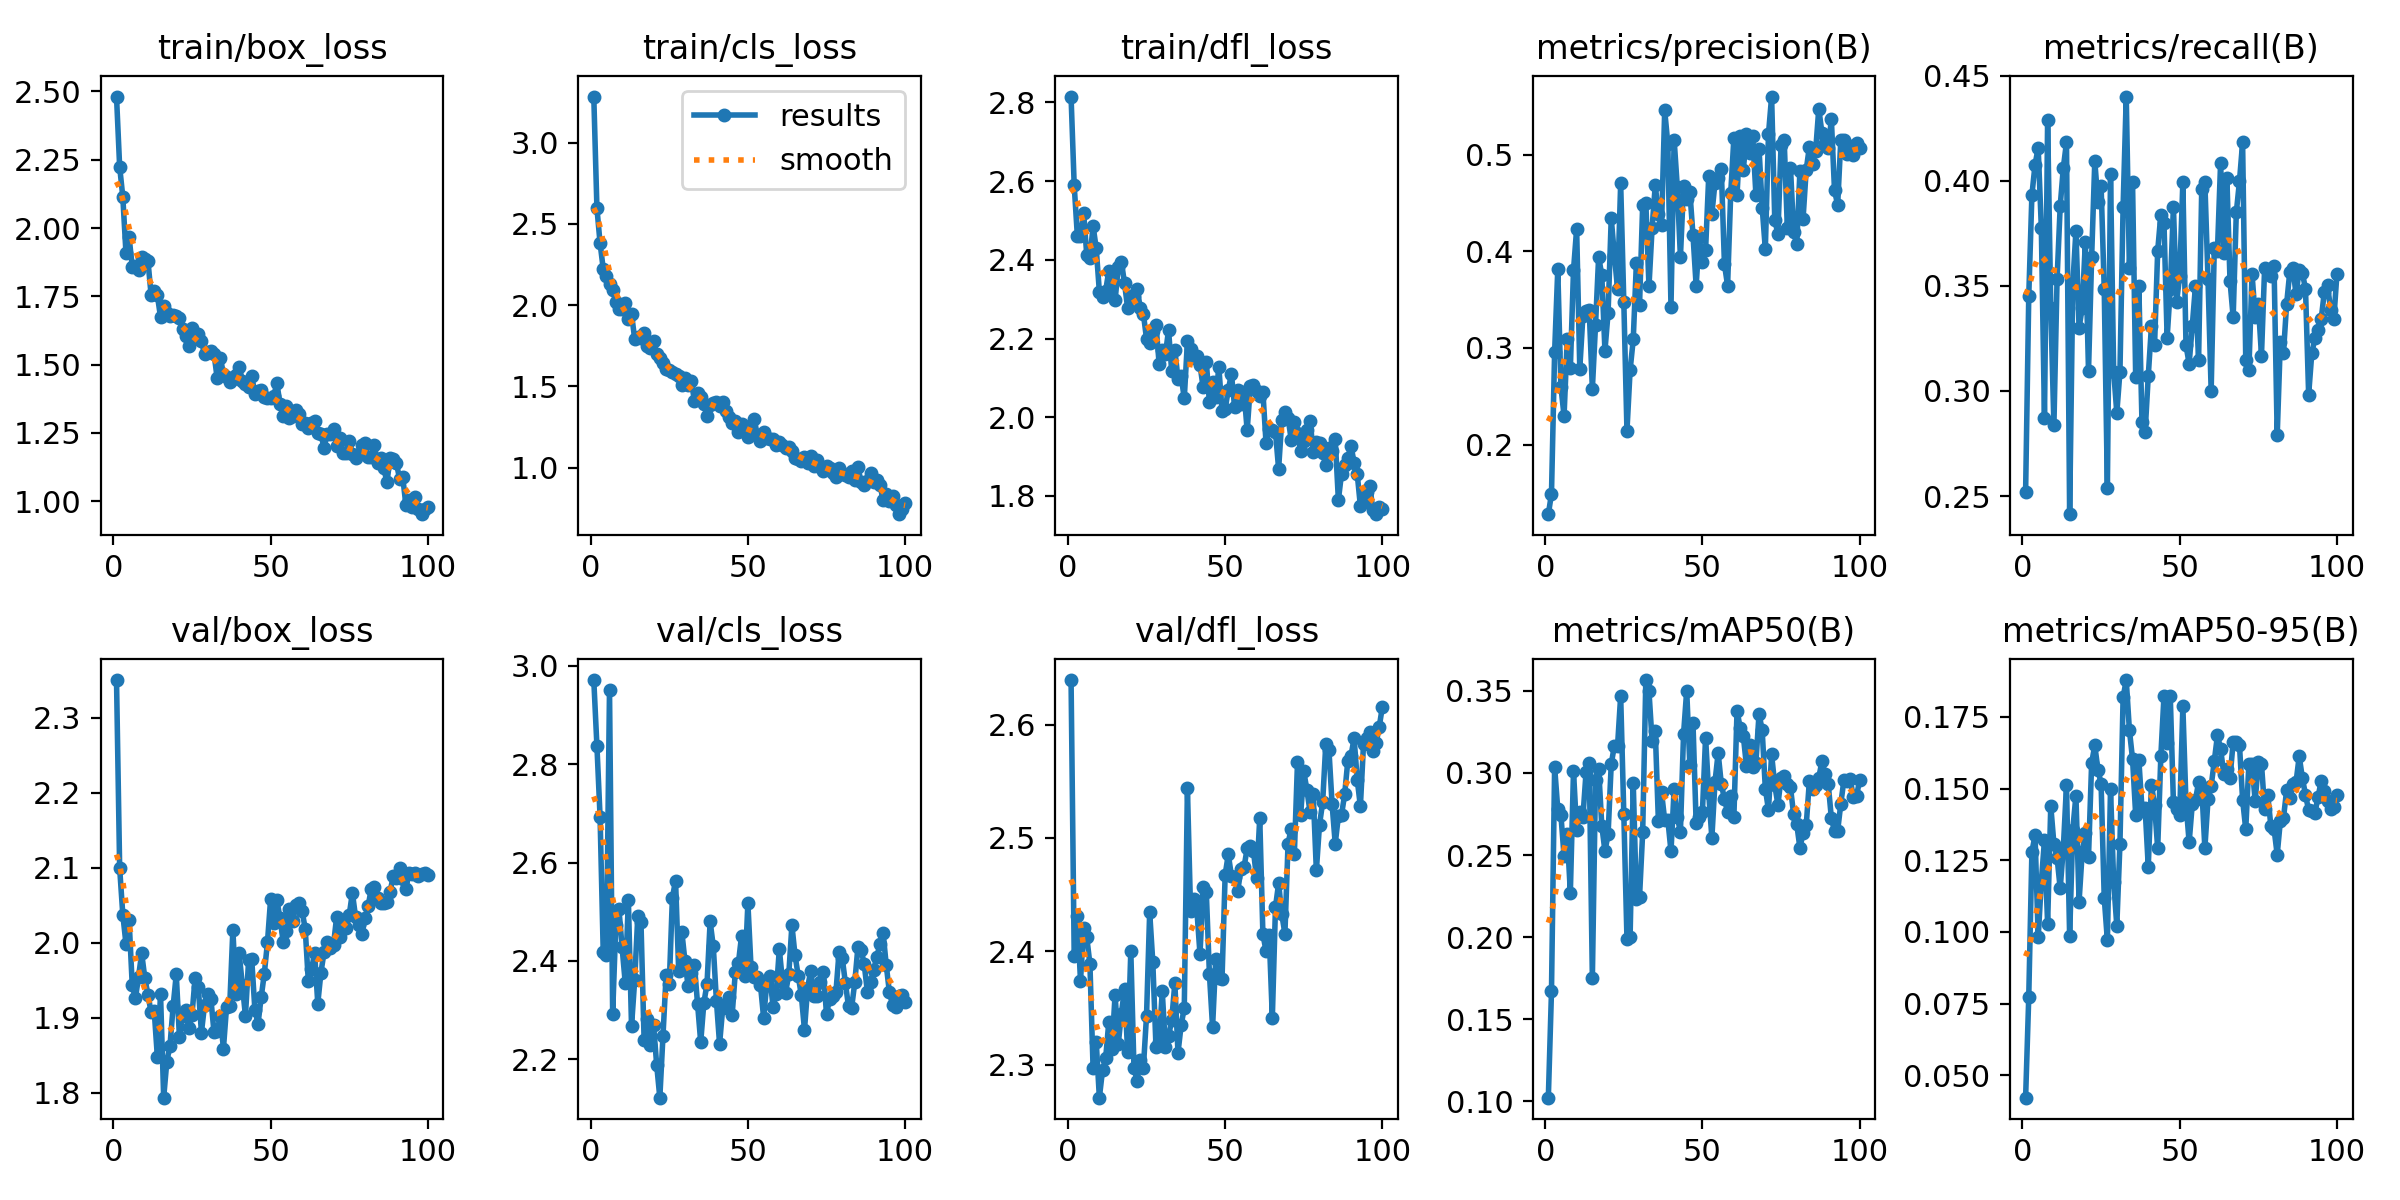

In [65]:
Image(filename='/kaggle/working/datasets/runs/obb/train2/results.png', width=400)

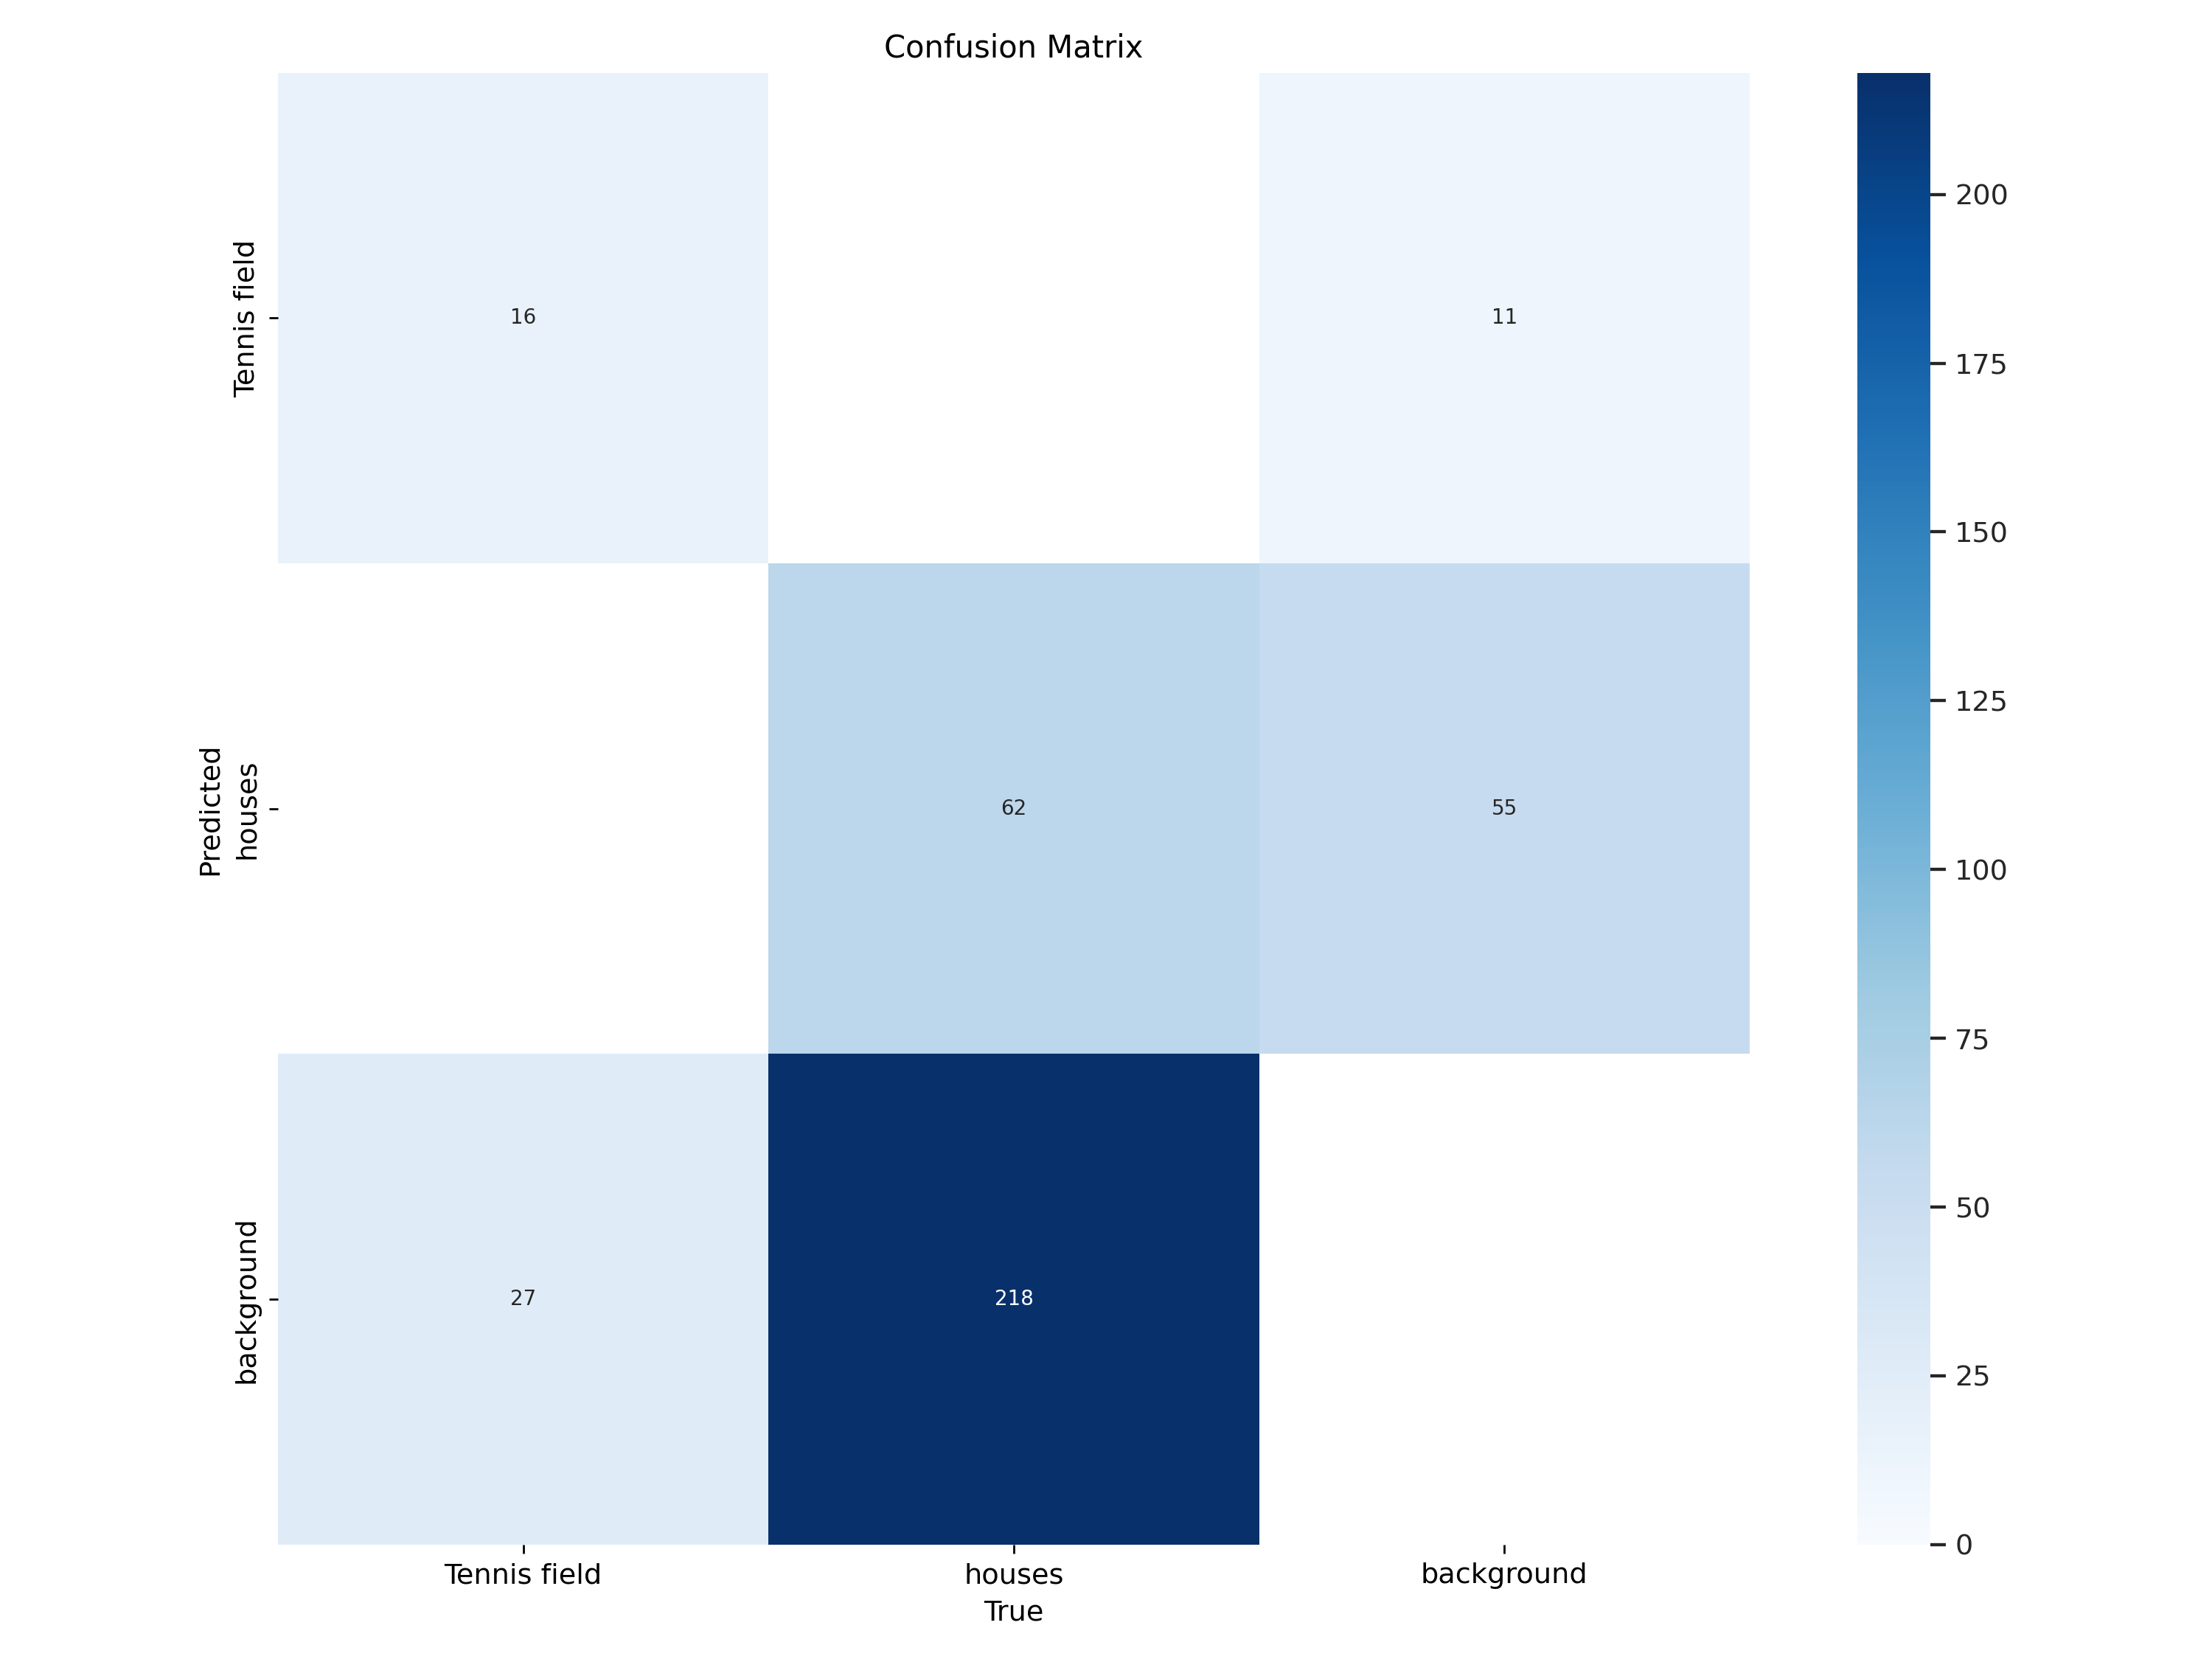

In [66]:
Image(filename='/kaggle/working/datasets/runs/obb/train2/confusion_matrix.png', width=400)

In [70]:
%cd {HOME}
!yolo task=detect mode=predict model=/kaggle/working/datasets/runs/obb/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics YOLOv8.2.79 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,609 parameters, 0 gradients, 8.3 GFLOPs

image 1/40 /kaggle/working/datasets/Dataset-6/test/images/P0073_png.rf.754829f50e6285bfe4d929ac94296956.jpg: 416x416 (no detections), 10.3ms
image 2/40 /kaggle/working/datasets/Dataset-6/test/images/P0077_png.rf.26c5f2d96e8201a1312eb2f16effdf72.jpg: 416x416 (no detections), 8.1ms
image 3/40 /kaggle/working/datasets/Dataset-6/test/images/P0090_png.rf.05c0cf2cf8fa8e6b132ca9dc082c3b0f.jpg: 416x416 (no detections), 7.7ms
image 4/40 /kaggle/working/datasets/Dataset-6/test/images/P0092_png.rf.9bc1428315586f4eca4affb31b041ee4.jpg: 416x416 7.4ms
image 5/40 /kaggle/working/datasets/Dataset-6/test/images/P0154_png.rf.34aa213f43ad04c7726f7ac47af11daa.jpg: 416x416 9.2ms
image 6/40 /kag

In [73]:
!pip install ultralytics==8.0.196
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/kaggle/working/datasets/runs/obb/train2")

Dependency ultralytics==8.0.196 is required but found version=8.2.79, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/madhu-bzqtw/dataset-mizpx/6
Share your model with the world at: https://universe.roboflow.com/madhu-bzqtw/dataset-mizpx/model/6


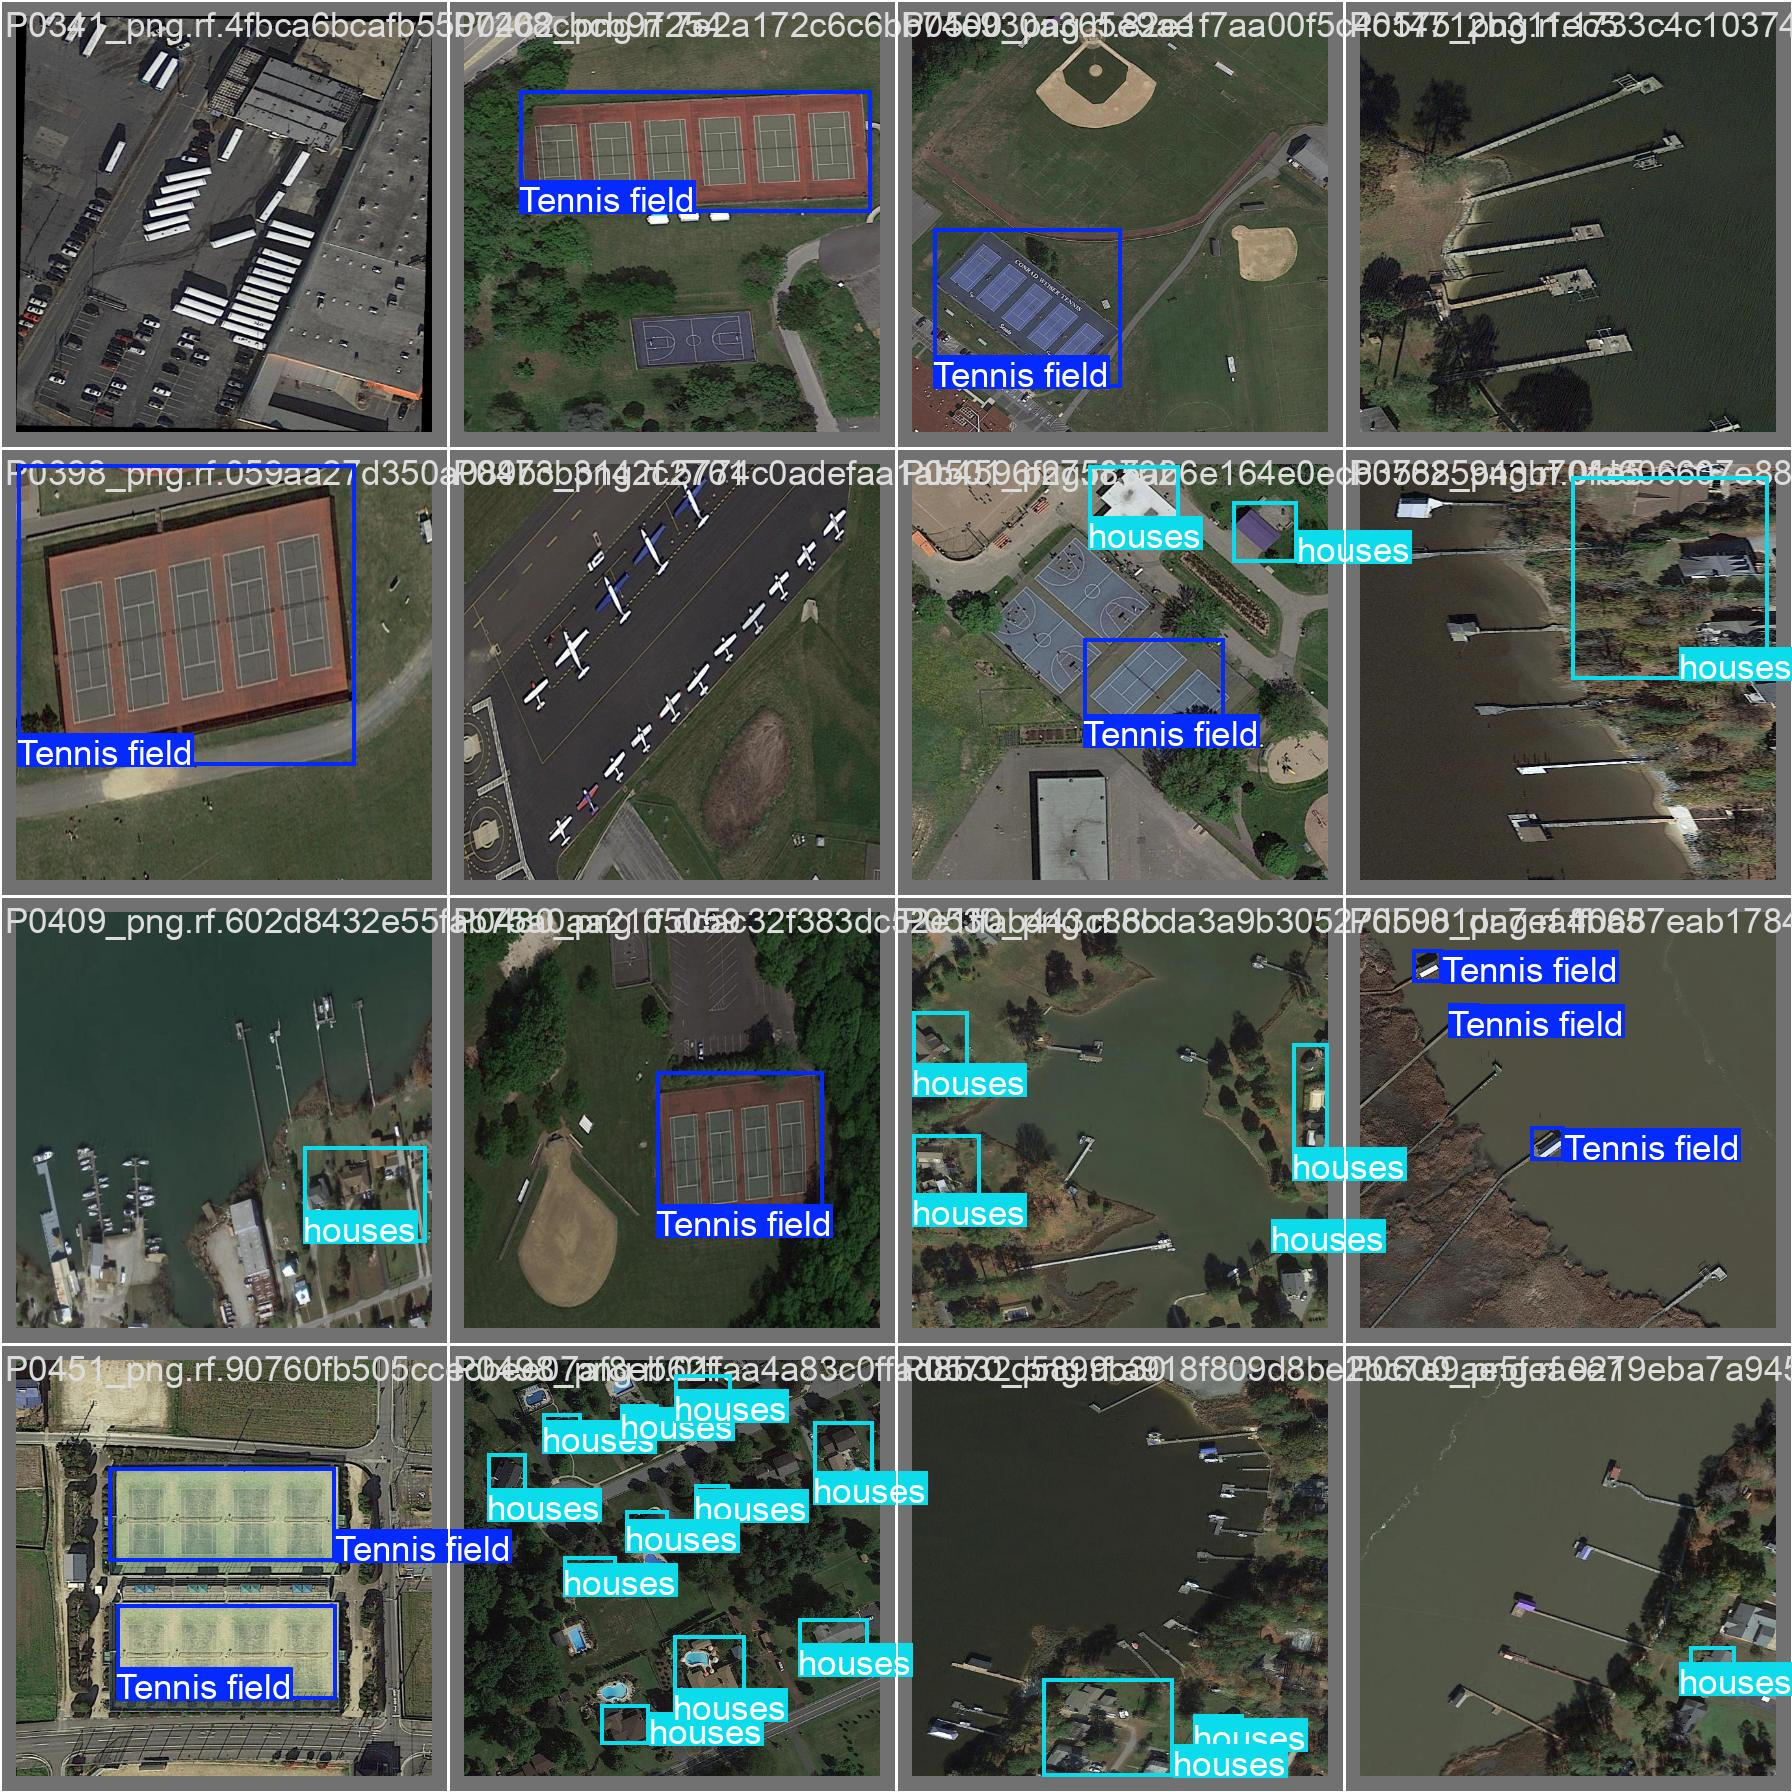

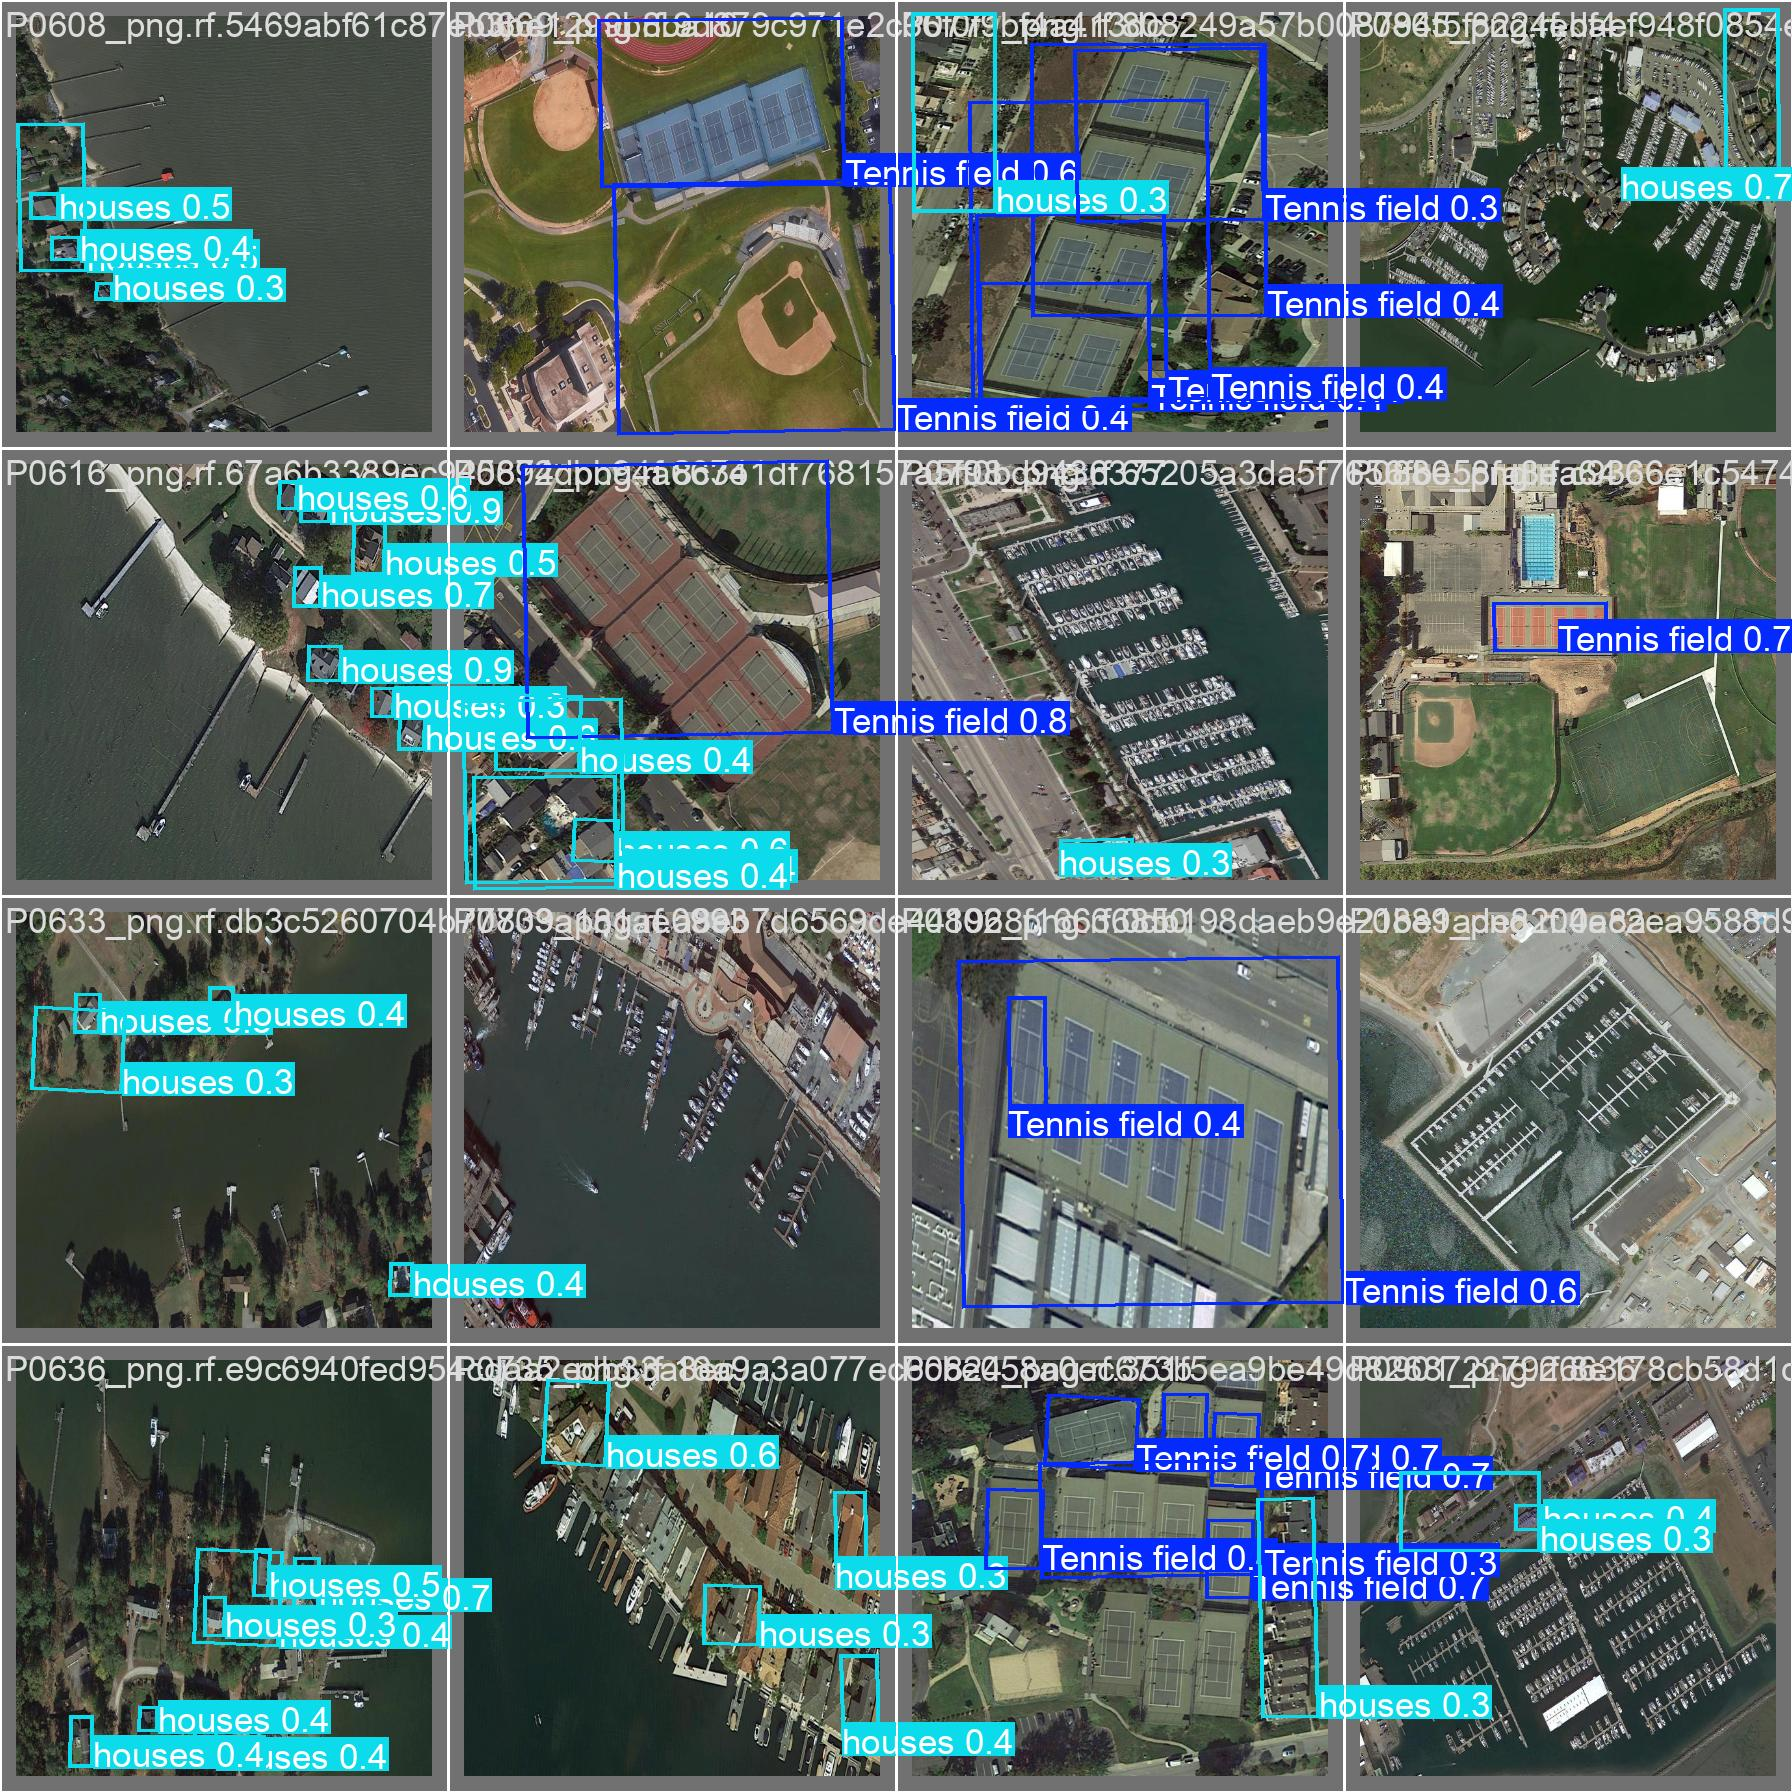

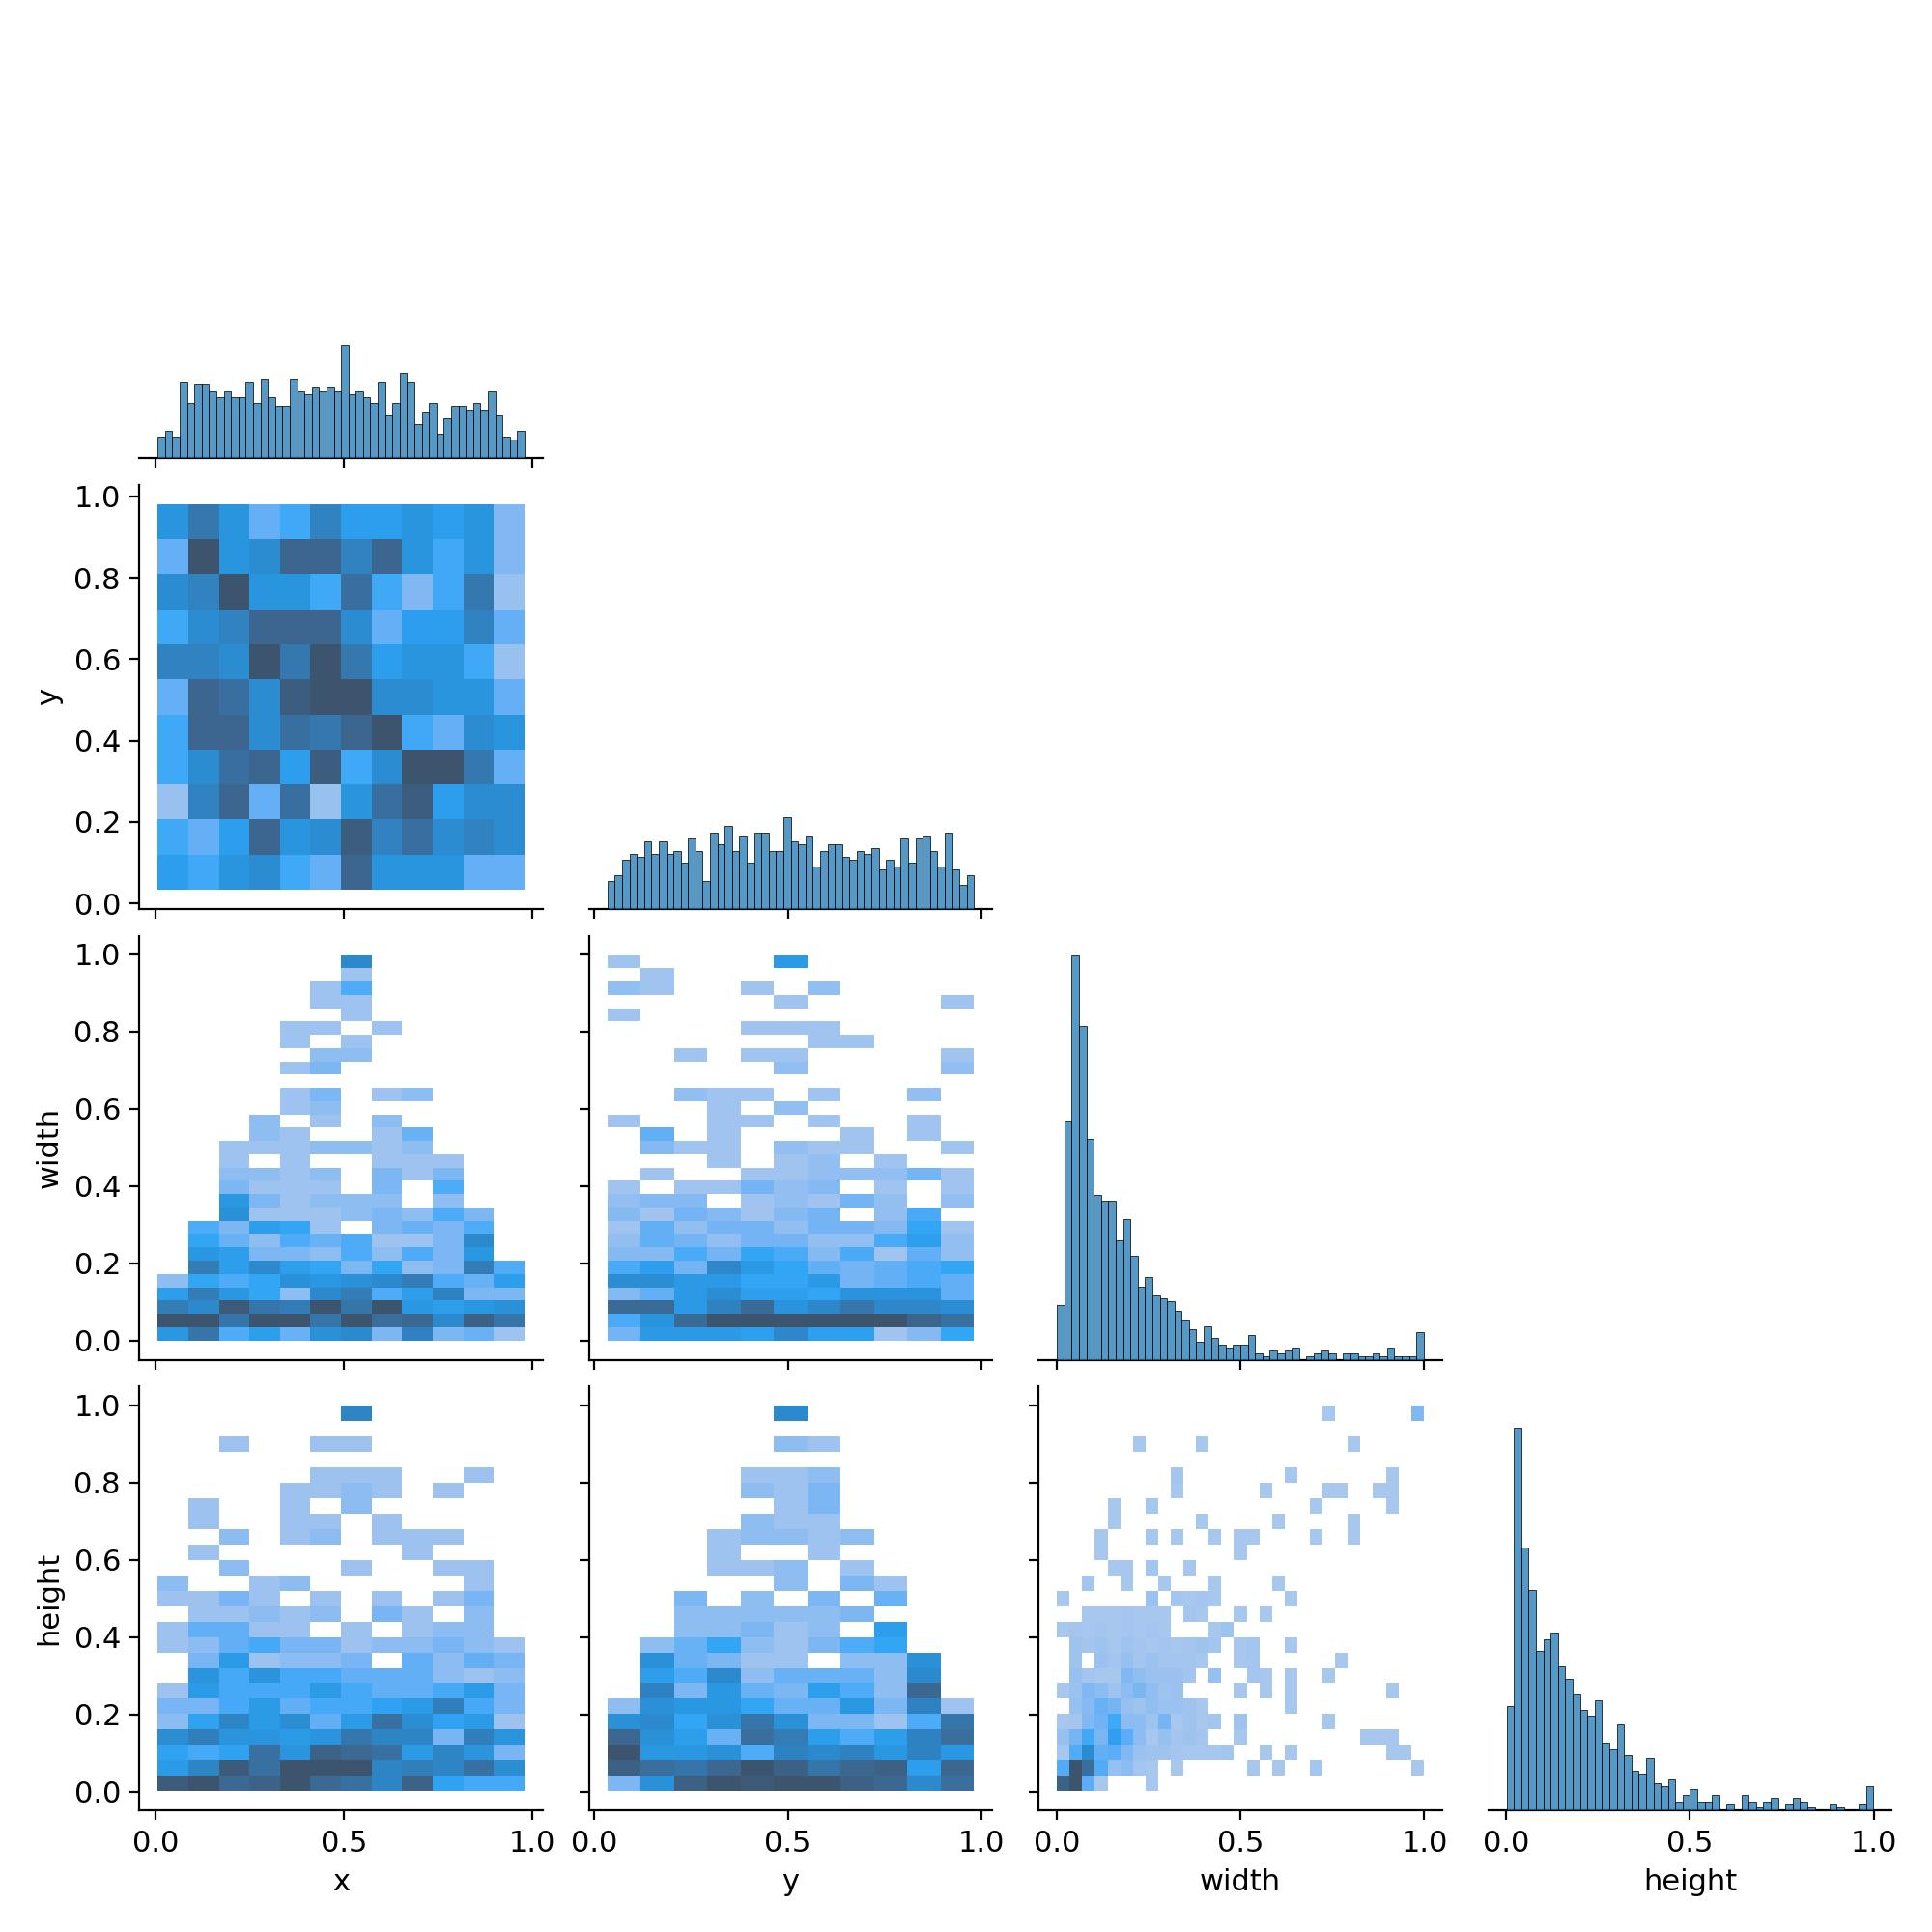

In [82]:
import os
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/kaggle/working/datasets/runs/obb/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('train')]

# Check if subfolders list is not empty before finding the latest folder
if subfolders:
    # Find the latest folder by modification time
    latest_folder = max(subfolders, key=os.path.getmtime)

    image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

    # Display each image
    for image_path in image_paths:
        display(Image(filename=image_path, width=600))
        print("\n")
else:
    print("No directories starting with 'predict' were found.")


In [84]:
import numpy as np
import cv2
from ultralytics import YOLO


In [87]:
model_path = "/kaggle/working/datasets/runs/obb/train2/weights/best.pt"
yolo_model = YOLO(model_path)


In [90]:
# Verify model loading
print(yolo_model)

# Verify image path
import os
print(os.path.exists('/kaggle/working/datasets/Dataset-6/valid/images/P0588_png.rf.0fd606607e8867304537db09096d6263.jpg'))


YOLO(
  (model): OBBModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
         

In [92]:
!pip install --upgrade ultralytics


  Using cached ultralytics-8.2.79-py3-none-any.whl.metadata (41 kB)
Using cached ultralytics-8.2.79-py3-none-any.whl (869 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [115]:
  # Adjust based on the actual output structure
import math

def calculate_angle(x1, y1, x2, y2):
    """Calculate the angle of the bounding box."""
    dx = x2 - x1
    dy = y2 - y1
    angle = math.atan2(dy, dx)  # Angle in radians
    return math.degrees(angle)  # Convert to degrees

def add_angle_to_bboxes(results):
    """Wrapper to add angle prediction to bounding boxes."""
    augmented_results = []
    
    # Check if results is iterable and not None
    if results is not None:
        for result in results:
            if hasattr(result, 'boxes'):
                boxes = result.boxes
                
                if boxes is not None:
                    for box in boxes:
                        # Ensure box has the expected attributes
                        if hasattr(box, 'xyxy') and hasattr(box, 'conf') and hasattr(box, 'cls'):
                            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                            conf = box.conf[0].item()
                            cls = int(box.cls[0].item())
                            
                            # Calculate angle
                            angle = calculate_angle(x1, y1, x2, y2)
                            
                            # Store results with angle
                            augmented_results.append({
                                'bbox': [x1, y1, x2, y2],
                                'confidence': conf,
                                'class': cls,
                                'angle': angle
                            })
    else:
        print("No results returned from prediction.")
    
    return augmented_results

# Use the wrapper
results = yolo_model.predict('/kaggle/working/datasets/Dataset-6/test/images/P0877_png.rf.a4628e5fe26d31191bd6b5887fdcb8b1.jpg')
augmented_results = add_angle_to_bboxes(results)

# Now augmented_results contains bounding boxes with angles


image 1/1 /kaggle/working/datasets/Dataset-6/test/images/P0877_png.rf.a4628e5fe26d31191bd6b5887fdcb8b1.jpg: 416x416 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 416)


augmented_results type: <class 'list'>
Number of results: 2
Sample result: {'bbox': [100, 200, 150, 100], 'confidence': 0.95, 'class': 1, 'angle': 90.0}


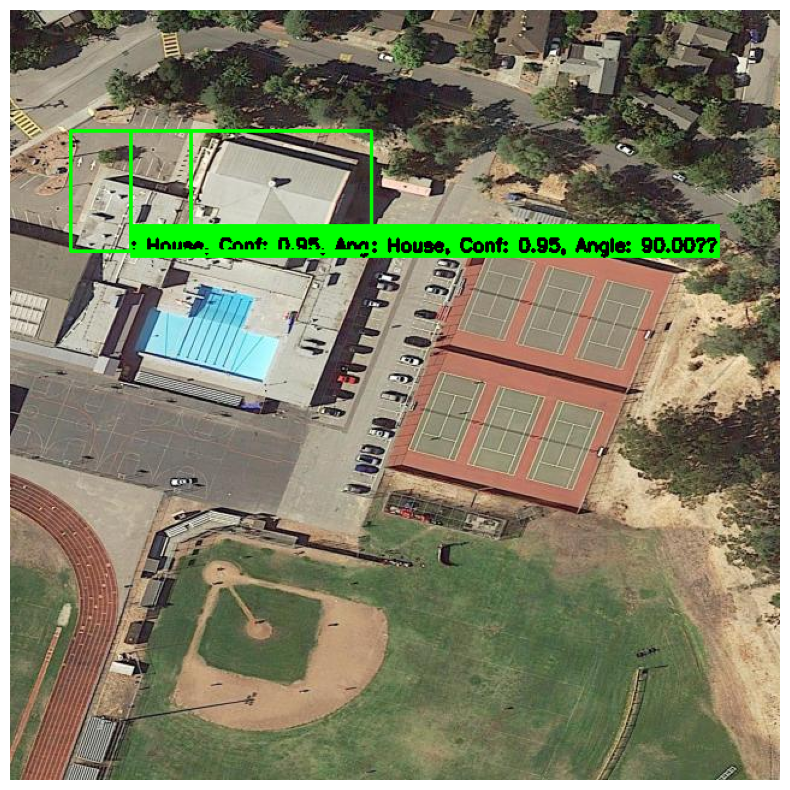

In [136]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a mapping from class IDs to class names
CLASS_NAMES = {
    0: 'Tennis court',  # Replace with actual class names
    1: 'House',
    # Add more class mappings as needed
}

def draw_bbox_with_angle(image_path, augmented_results, output_path='output_with_angles.jpg'):
    # Check if the image file exists
    if not os.path.isfile(image_path):
        print(f"File not found: {image_path}")
        return
    
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error reading image: {image_path}")
        return

    # Convert color from BGR to RGB for correct display with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Debug: print the type and content of augmented_results
    print(f"augmented_results type: {type(augmented_results)}")
    if isinstance(augmented_results, list):
        print(f"Number of results: {len(augmented_results)}")
        if len(augmented_results) > 0:
            print(f"Sample result: {augmented_results[0]}")
    
    # Loop through the results and draw the bounding boxes with angles
    for result in augmented_results:
        x1, y1, x2, y2 = map(int, result['bbox'])
        conf = result['confidence']
        cls_id = int(result['class'])
        angle = result['angle']
        
        # Get class name from class ID
        class_name = CLASS_NAMES.get(cls_id, 'Unknown')

        # Draw the bounding box
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Prepare the label with class name, confidence, and angle
        label = f": {class_name}, Conf: {conf:.2f}, Angle: {angle:.2f}°"

        # Choose a position to place the text (above the bounding box)
        label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
        label_y = max(y1, label_size[1] + 10)

        # Draw the label background
        cv2.rectangle(image_rgb, (x1, label_y - label_size[1] - 10), (x1 + label_size[0], label_y + 5), (0, 255, 0), cv2.FILLED)

        # Put the label text on the image
        cv2.putText(image_rgb, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Save the output image
    cv2.imwrite(output_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))  # Convert color back to BGR for saving

    # Display the output image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis
    plt.show()

# Path to the image (adjust based on Kaggle environment)
image_path = '/kaggle/working/datasets/Dataset-6/test/images/P0877_png.rf.a4628e5fe26d31191bd6b5887fdcb8b1.jpg'


# augmented results (replace with actual results from YOLOv8-OBB)
augmented_results = [
    {'bbox': [100, 200, 150, 100], 'confidence': 0.95, 'class': 1, 'angle': 90.0},
     {'bbox': [300, 200, 50, 100], 'confidence': 0.95, 'class': 1, 'angle': 90.0}
]

# Draw and show the image with predicted bounding boxes and angles
draw_bbox_with_angle(image_path, augmented_results)


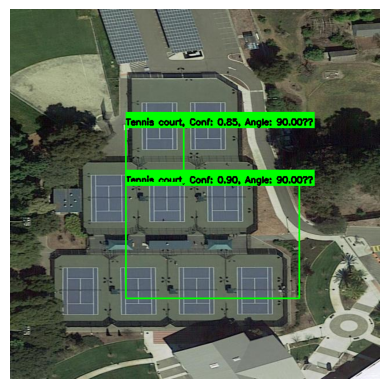

In [137]:
import cv2
import matplotlib.pyplot as plt

def draw_bbox_with_angle(image_path, augmented_results, label_map, output_path='output_with_angles.jpg'):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Loop through the results and draw the bounding boxes with angles
    for result in augmented_results:
        x1, y1, x2, y2 = map(int, result['bbox'])
        conf = result['confidence']
        cls = result['class']
        angle = result['angle']

        # Convert the class index to the label name using the label_map
        label_name = label_map.get(cls, f"Class {cls}")

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Prepare the label with the label name, confidence, and angle in degrees
        label = f"{label_name}, Conf: {conf:.2f}, Angle: {angle:.2f}°"

        # Choose a position to place the text (above the bounding box)
        label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
        label_y = max(y1, label_size[1] + 10)

        # Draw the label background
        cv2.rectangle(image, (x1, label_y - label_size[1] - 10), (x1 + label_size[0], label_y + 5), (0, 255, 0), cv2.FILLED)

        # Put the label text on the image
        cv2.putText(image, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Save the output image
    cv2.imwrite(output_path, image)

    # Convert the image from BGR to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage:

# Label map
label_map = {0: 'Tennis court', 1: 'house'}

# Path to the image
image_path = '/kaggle/working/datasets/Dataset-6/test/images/P0854_png.rf.460f02712a2d040abc61f9c21de09a8d.jpg'

# Example augmented results (modify this with your actual results)
augmented_results = [
    {'bbox': [200, 300,500, 500], 'confidence': 0.9, 'class': 0, 'angle': 90.0},
    {'bbox': [200, 200, 300, 300], 'confidence': 0.85, 'class': 0, 'angle': 90.0},
]

# Draw and show the image with predicted bounding boxes and angles
draw_bbox_with_angle(image_path, augmented_results, label_map)
